In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn import preprocessing

In [2]:
data_1 = loadmat("project8data1.mat")

In [3]:
data_1.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [4]:
data_1["X"].shape

(50, 2)

In [5]:
X = data_1["X"]

m = X.shape[0]

In [6]:
X

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],
       [4.92948801, 5.95501971],
       [5.79295774, 5.10839305],
       [2.81684824, 4.81895769],
       [3.88882414, 5.10036564],
       [3.

In [7]:
m

50

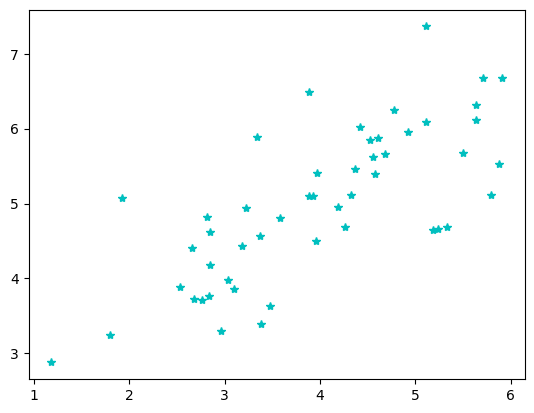

In [8]:
plt.plot(X[:,0], X[:,1], "c*")

In [9]:
pca = PCA(n_components = 1)
X_1D = pca.fit_transform(X)

In [10]:
X

array([[3.38156267, 3.38911268],
       [4.52787538, 5.8541781 ],
       [2.65568187, 4.41199472],
       [2.76523467, 3.71541365],
       [2.84656011, 4.17550645],
       [3.89067196, 6.48838087],
       [3.47580524, 3.63284876],
       [5.91129845, 6.68076853],
       [3.92889397, 5.09844661],
       [4.56183537, 5.62329929],
       [4.57407171, 5.39765069],
       [4.37173356, 5.46116549],
       [4.19169388, 4.95469359],
       [5.24408518, 4.66148767],
       [2.8358402 , 3.76801716],
       [5.63526969, 6.31211438],
       [4.68632968, 5.6652411 ],
       [2.85051337, 4.62645627],
       [5.1101573 , 7.36319662],
       [5.18256377, 4.64650909],
       [5.70732809, 6.68103995],
       [3.57968458, 4.80278074],
       [5.63937773, 6.12043594],
       [4.26346851, 4.68942896],
       [2.53651693, 3.88449078],
       [3.22382902, 4.94255585],
       [4.92948801, 5.95501971],
       [5.79295774, 5.10839305],
       [2.81684824, 4.81895769],
       [3.88882414, 5.10036564],
       [3.

In [11]:
X_1D

array([[ 1.49876595],
       [-0.95839024],
       [ 1.40325172],
       [ 1.76421694],
       [ 1.40760243],
       [-0.87367998],
       [ 1.27050164],
       [-2.5506712 ],
       [-0.01469839],
       [-0.83694188],
       [-0.70212917],
       [-0.58711016],
       [-0.12493311],
       [-0.74690506],
       [ 1.67629396],
       [-2.10275704],
       [-0.9594953 ],
       [ 1.11633715],
       [-2.37070273],
       [-0.69001651],
       [-2.39397485],
       [ 0.44284714],
       [-1.98340505],
       [-0.01058959],
       [ 1.83205377],
       [ 0.62719172],
       [-1.33171608],
       [-1.4546727 ],
       [ 1.01919098],
       [ 0.01489202],
       [-0.07212622],
       [-1.78539513],
       [ 1.41318051],
       [-0.82644523],
       [ 0.75167377],
       [-1.40551081],
       [ 1.82309802],
       [-1.59458841],
       [ 2.80783613],
       [-0.32551527],
       [-0.98578762],
       [ 0.98465469],
       [ 1.38952836],
       [-1.03742062],
       [ 1.87686597],
       [-0

In [12]:
X_1D.shape

(50, 1)

In [13]:
X_reconstructed = pca.inverse_transform(X_1D)

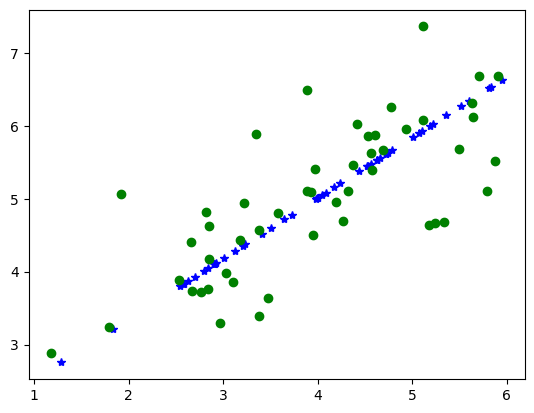

In [14]:
plt.plot(X_reconstructed[:, 0], X_reconstructed[:, 1], "b*")
plt.plot(X[:, 0], X[:, 1], "go")

In [15]:
face_imgs = loadmat("project8faces.mat")

In [16]:
face_imgs.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [17]:
data = face_imgs["X"]
data.shape

(5000, 1024)

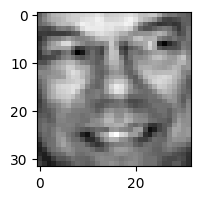

In [18]:
plt.figure(figsize= (2, 2))
plt.imshow(np.reshape(data[15, :], (32, 32)).T, cmap= "gray")

In [19]:
scaler = preprocessing.StandardScaler().fit(data)
data_norm = scaler.transform(data)

In [20]:
pca_img = PCA(n_components= 100)
data_compressed = pca_img.fit_transform(data_norm)

In [21]:
data_compressed.shape

(5000, 100)

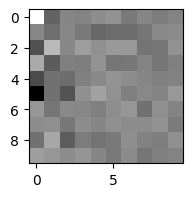

In [22]:
plt.figure(figsize= (2,2))
plt.imshow(np.reshape(data_compressed[15, :], (10, 10)).T, cmap= "gray")

In [23]:
data_recovered = pca_img.inverse_transform(data_compressed)

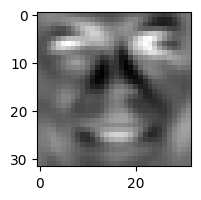

In [24]:
plt.figure(figsize= (2,2))
plt.imshow(np.reshape(data_recovered[15, :], (32, 32)).T, cmap= "gray")